In [4]:
#Import Modules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pickle
import numpy as np
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
#Read csv into DF
df = pd.read_csv("C:/Sem 2/web mining/git clone/BIA-660-main/dataset/all_reviews_processed.csv")

In [6]:
df.head

<bound method NDFrame.head of                Date                         Resturant Name  Rating  \
0         11/7/2021  10Th And Willow Bar And Grill Hoboken       5   
1         11/1/2021  10Th And Willow Bar And Grill Hoboken       1   
2          7/7/2021  10Th And Willow Bar And Grill Hoboken       4   
3         6/14/2021  10Th And Willow Bar And Grill Hoboken       5   
4          5/2/2021  10Th And Willow Bar And Grill Hoboken       3   
...             ...                                    ...     ...   
61524   3 years ago                     Zero Otto Uno Cafe       5   
61525   3 years ago                     Zero Otto Uno Cafe       5   
61526   3 years ago                     Zero Otto Uno Cafe       4   
61527   3 years ago                     Zero Otto Uno Cafe       5   
61528   3 years ago                     Zero Otto Uno Cafe       5   

                                                  Review  Source  
0      loved place much appetizer look great decided ...    Ye

In [7]:
#Data Preprocessing
docs = df['Review']
docs.head

<bound method NDFrame.head of 0        loved place much appetizer look great decided ...
1        terrible wing recommended go get wing got wate...
2        standard looking american bar inside tv sport ...
3        place n't get 5 star rating every patron walk ...
4        nothing special would really give 2 5 star cou...
                               ...                        
61524    great true italian food margarita pizza good 1...
61525            nice people real italian food molto bravi
61526    got delivery spot pleased personal pizza makin...
61527    pizza absolutely incredible wife came hearing ...
61528    place great finally neapolitan pizza place ope...
Name: Review, Length: 61529, dtype: object>

In [8]:
#Get the TF-IDF Vectorizer and Features
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(docs)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

Text(0, 0.5, 'Silhouette score')

Text(0.5, 0, 'k')

Text(0.5, 1.0, 'Silhouette Score for K-means')

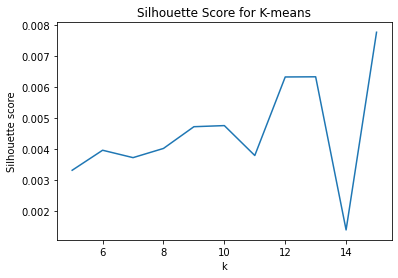

In [7]:
#Get the silhouette scores to determine optimum K 
s = []
k = []
for n_clusters in range(5,16):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(features, labels, metric='euclidean'))
    k.append(n_clusters)

#Plot the silhouette scores over the range 
plt.plot(k, s)
plt.ylabel("Silhouette score")
plt.xlabel("k")
plt.title("Silhouette Score for K-means")

In [30]:
#Model KMeans using k = 15
k = 15
model = KMeans(n_clusters=k, init='k-means++',max_iter = 100,n_init=1)
final = model.fit(features)

In [10]:
#Add a column "Clusters" to the df assigning model labels
df['cluster']= model.labels_

In [10]:
#Create csv's for each cluster and their corresponding reviews
clusters = df.groupby('cluster')
for cluster in clusters.groups:
    f=open('cluster'+str(cluster)+'.csv','w')
    data= clusters.get_group(cluster)[['Resturant Name','Review']]
    f.write(data.to_csv(index_label='id'))
    f.close()

2883263

218493

3114736

128934

484214

667651

647654

247097

1398248

233265

935052

5028287

121562

213272

327797

In [23]:
#Get the cluster centroid words to see what each cluster is talking about
print("Cluster centroids: \n")
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
terms=vectorizer.get_feature_names()
clusters = {}
for i in range(k):
    print("Cluster %d:" %i)
    words = []
    for j in order_centroids[i,:10]:
        print('%s'% terms[j])
        words.append(terms[j])
    print('--------------')
    clusters[i] = words

Cluster centroids: 

Cluster 0:
delicious
food
service
great
friendly
staff
fresh
place
recommend
definitely
--------------
Cluster 1:
good
food
service
place
price
really
friendly
great
pretty
drink
--------------
Cluster 2:
cake
cooky
cream
ice
cupcake
chocolate
bakery
sweet
good
cookie
--------------
Cluster 3:
great
food
service
place
atmosphere
staff
excellent
friendly
drink
good
--------------
Cluster 4:
sushi
roll
hoboken
place
fresh
good
great
best
fish
service
--------------
Cluster 5:
best
hoboken
sandwich
food
place
town
italian
mozzarella
great
deli
--------------
Cluster 6:
amazing
food
service
great
place
staff
friendly
love
recommend
definitely
--------------
Cluster 7:
steak
good
great
cheese
place
food
service
best
ordered
cooked
--------------
Cluster 8:
food
place
good
great
love
chicken
service
like
hoboken
sandwich
--------------
Cluster 9:
pizza
slice
best
good
great
place
hoboken
crust
pie
delicious
--------------
Cluster 10:
coffee
great
shop
place
good
friendly

In [12]:
# Save Vectorizer and Model
pickle.dump(model, open('model/KMeans_model.sav', 'wb'))
pickle.dump(vectorizer, open("model/KMeans_vectorizer.sav", "wb"))

In [13]:
#Load the vectorizer and model
model= pickle.load(open('model/KMeans_model.sav', 'rb'))
vectorizere = pickle.load(open("model/KMeans_vectorizer.sav", "rb"))

In [14]:
print(model) 

KMeans(max_iter=100, n_clusters=15, n_init=1)


In [24]:
#Function to predict topics/Aspects in Yelp reviews folder
def predict_topics_yelp(location,model,vectorizer):
    df1 = pd.read_csv(location)
    df1=df1['review']
    df1.replace('',np.nan,inplace=True)
    df1.dropna(inplace=True)
    print(location)
    text = vectorizer.transform(df1)
    predict = model.predict(text)
    print(clusters[predict[0]])
  
    
    

In [25]:
#Function to predict topics/Aspects in Google reviews folder
def predict_topics_google(location,model,vectorizer):
    df1 = pd.read_csv(location)
    df1=df1['text']
    df1.replace('',np.nan,inplace=True)
    df1.dropna(inplace=True)
    print(location)
    text = vectorizer.transform(df1)
    predict = model.predict(text)
    print(clusters[predict[0]])
    

In [26]:
#Process each restaurant's csv in Yelp Reviews folder
def process_yelp(model,vectorizer):
    directory = "C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/yelp/processed_reviews/"
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            predict_topics_yelp(os.path.join(directory,filename),model,vectorizer)


In [27]:
#Process each restaurant's csv in Google Reviews folder
def process_google(model,vectorizer):
    directory= "C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/google/processed_reviews/"
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            predict_topics_google(os.path.join(directory,filename),model,vectorizer)

    

In [28]:
#Get the aspects of restaurants scraped from Google Reviews
process_google(model,vectorizere)

C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/google/processed_reviews/7-stars-pizzeria_processed.csv
['food', 'place', 'good', 'great', 'love', 'chicken', 'service', 'like', 'hoboken', 'sandwich']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/google/processed_reviews/80-river-bar-kitchen_processed.csv
['food', 'time', 'drink', 'bar', 'order', 'table', 'place', 'good', 'service', 'came']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/google/processed_reviews/8th-street-tavern_processed.csv
['good', 'food', 'service', 'place', 'price', 'really', 'friendly', 'great', 'pretty', 'drink']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/google/processed_reviews/acai-ya-later_processed.csv
['food', 'place', 'good', 'great', 'love', 'chicken', 'service', 'like', 'hoboken', 'sandwich']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/google/processed_reviews/acme-markets_processed.csv
['food', 'place', 'good', 'great', 'love', 'chicken', 'service', 'like', 'hoboken', 'sa

In [29]:
#Get the aspects of restaurants scraped from Yelp Reviews
process_yelp(model,vectorizere)

C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/yelp/processed_reviews/10th-and-willow-bar-and-grill-hoboken_processed.csv
['food', 'place', 'good', 'great', 'love', 'chicken', 'service', 'like', 'hoboken', 'sandwich']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/yelp/processed_reviews/16-handles-hoboken_processed.csv
['food', 'place', 'good', 'great', 'love', 'chicken', 'service', 'like', 'hoboken', 'sandwich']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/yelp/processed_reviews/acai-ya-later-hoboken_processed.csv
['food', 'place', 'good', 'great', 'love', 'chicken', 'service', 'like', 'hoboken', 'sandwich']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/yelp/processed_reviews/ainsworth-hoboken-hoboken_processed.csv
['food', 'place', 'good', 'great', 'love', 'chicken', 'service', 'like', 'hoboken', 'sandwich']
C:/Sem 2/web mining/git_latest/BIA-660-main/dataset/yelp/processed_reviews/alessios-cafe-gelato-pizza-hoboken_processed.csv
['great', 'food', 'service', 'p